In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp

import sys
sys.path.append('../')

from utils import plot_evals_list
from rltoolkit import A2C

Here we have simple function for evaluations where you can change hyperparameters and run with multiprocessing: \
If you see wierd multiprocessing errors try to run cell again.

Here we will run experiment with `gamma=0.95`

In [ ]:
processes = 3 # Number of threads
evaluations = 3 # Number of evaluations to run

def evaluate(_):
    model = A2C(
        iterations=200, # Number of training iterations
        gamma=0.95, 
        batch_size=50,
        stats_freq=20, 
        tensorboard_dir="tensorboard", 
        tensorboard_comment="A2C",
        actor_lr=3e-3,
        critic_lr=3e-4,
        critic_num_target_updates=10,
        num_critic_updates_per_target=10,
        normalize_adv=True,
        return_done = None,
    )
    model.train()
    return model.stats_logger.stats

with mp.Pool(processes) as p:
    outputs = p.map(evaluate, range(evaluations))

Next will be `gamma=0.99`

In [ ]:
processes = 3 # Number of threads
evaluations = 3 # Number of evaluations to run

def evaluate(_):
    model = A2C(
        iterations=200, # Number of training iterations
        gamma=0.99, 
        batch_size=50,
        stats_freq=10, 
        tensorboard_dir="tensorboard", 
        tensorboard_comment="A2C",
        actor_lr=3e-3,
        critic_lr=3e-4,
        critic_num_target_updates=10,
        num_critic_updates_per_target=10,
        normalize_adv=True,
    )
    model.train()
    return model.stats_logger.stats

with mp.Pool(processes) as p:
    outputs_2 = p.map(evaluate, range(evaluations))

Plotting the results:

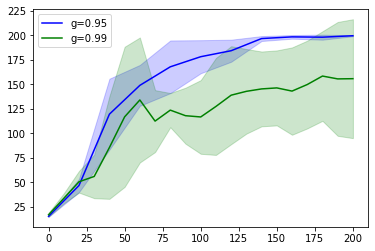

In [7]:
plot_evals_list(outputs, color="blue")
plot_evals_list(outputs_2, color="green")
plt.legend(["g=0.95", "g=0.99"], loc='upper left')

### Tasks:
In example above only 3 seeds was run. For your experiments use at least 10.
1. Plot how different values of `gamma` [0.9, 0.95, 0.99] impact training.
2. Check whether normalization of advantages  (`normalize_adv`) improves performance.
3. Explore impact of frequent critic updates setting following parameters:
    * `critic_num_target_updates=1` and `num_critic_updates_per_target=1`
    * `critic_num_target_updates=100` and `num_critic_updates_per_target=1`
    * `critic_num_target_updates=1` and `num_critic_updates_per_target=100`
    * `critic_num_target_updates=10` and `num_critic_updates_per_target=10`
    
Prepare plots to illustrate all experiments.

## Bonus
Simple rendering example (based on https://gym.openai.com/). \
First we train model:

In [9]:
model = A2C(
    iterations=20, # Number of training iterations
    gamma=0.95, 
    batch_size=200,
    stats_freq=10, 
    tensorboard_dir="tensorboard", 
    tensorboard_comment="A2C",
    actor_lr=3e-3,
    critic_lr=3e-4,
    critic_num_target_updates=10,
    num_critic_updates_per_target=10,
    normalize_adv=True,
)
model.train()

2020-12-21 13:09:42.376 MainProcess INFO  Iteration    0	 Running return:          22.22222222
2020-12-21 13:09:42.377 MainProcess INFO  Average iteration is 0.227799 seconds
2020-12-21 13:09:44.722 MainProcess INFO  Iteration   10	 Running return:          28.69517586
2020-12-21 13:09:44.723 MainProcess INFO  Average iteration is 0.23031930000000003 seconds
2020-12-21 13:09:46.918 MainProcess INFO  Task finished at 20th iteration. Running return is 22.962453189542384


Then we iterate through our environment:

In [11]:
import gym

num_frames = 100

env = gym.make("CartPole-v1")
observation = env.reset()
for _ in range(num_frames):
    env.render()
    action = model.action(observation) # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()